<a href="https://colab.research.google.com/github/SamuelGCardoso/Training_codes/blob/main/Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title: Solar Power Generation & Efficiency Analysis

Working with real data and finding issues

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/
[master (root-commit) 3fb33c2]  implementing more calculations e making look more clean
 21 files changed, 51059 insertions(+)
 create mode 100644 .config/.last_opt_in_prompt.yaml
 create mode 100644 .config/.last_survey_prompt.yaml
 create mode 100644 .config/.last_update_check.json
 create mode 100644 .config/active_config
 create mode 100644 .config/config_sentinel
 create mode 100644 .config/configurations/config_default
 create mode 100644 .config/default

/tmp/ipython-input-2499198715.py:24: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_solar['DATE_TIME'] = pd.to_datetime(df_solar['DATE_TIME'])



 'Solar Data Loaded Successfully!' 

   DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  \
0 2020-05-15   4135001  1BY6WEcLGh8j5v7       0.0       0.0          0.0   
1 2020-05-15   4135001  1IF53ai7Xc0U56Y       0.0       0.0          0.0   
2 2020-05-15   4135001  3PZuoBAID5Wc2HD       0.0       0.0          0.0   
3 2020-05-15   4135001  7JYdWkrLSPkdwr4       0.0       0.0          0.0   
4 2020-05-15   4135001  McdE0feGgRqW7Ca       0.0       0.0          0.0   

   TOTAL_YIELD  
0    6259559.0  
1    6183645.0  
2    6987759.0  
3    7602960.0  
4    7158964.0  


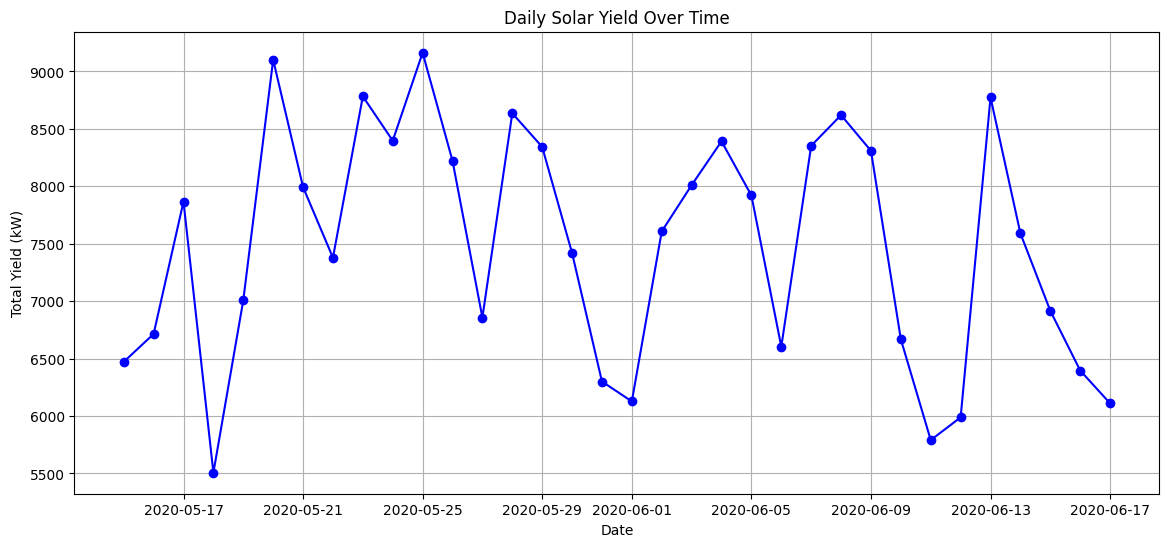

--- TOP 5 LOWEST PRODUCTION DAYS ---
DATE_TIME
2020-05-18    5506.0
2020-06-11    5790.0
2020-06-12    5988.0
2020-06-17    6110.0
2020-06-01    6127.0
Name: DAILY_YIELD, dtype: float64

--- NO SHUTDOWNS ---
Series([], Name: DAILY_YIELD, dtype: float64)

--- Inverter Performance on 2020-05-18 ---
SOURCE_KEY
bvBOhCH3iADSZry    4962.0
1BY6WEcLGh8j5v7    4998.0
ih0vzX44oOqAx2f    5286.0
7JYdWkrLSPkdwr4    5309.0
ZoEaEvLYb1n2sOq    5319.0
Name: DAILY_YIELD, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

'''!git init # Initialize a local git folder

# 2. Configure your identity
!git config --global user.email "samuel.g.cardoso@uel.br"
!git config --global user.name "SamuelGCardoso"

# 3. Add your files
!git add .

# 4. Commit and Push
!git commit -m " implementing more calculations e making look more clean"
!git remote add origin https://github.com/SamuelGCardoso/Training_codes.git
!git push -u origin main
'''

url = "https://raw.githubusercontent.com/kaivalpanchal/Solar-Panel-Power-Generation/refs/heads/main/Plant_1_Generation_Data.csv"
df_solar = pd.read_csv(url)

# Convert the 'DATE_TIME' column to actual Python dates
df_solar['DATE_TIME'] = pd.to_datetime(df_solar['DATE_TIME'])

# Show the first few rows

print('\n',f"\033[1m'Solar Data Loaded Successfully!'\033[0m",'\n')  #trying to make the code more friendly :-)

print(df_solar.head())

# 1. Create a summary of the total yield per day
daily_yield = df_solar.groupby(df_solar['DATE_TIME'].dt.date)['DAILY_YIELD'].max()

# 2. Visualize the production over time
plt.figure(figsize=(14, 6))   # figsize(x,y)
daily_yield.plot(kind='line', marker='o', color='blue')
plt.title('Daily Solar Yield Over Time')
plt.xlabel('Date')
plt.ylabel('Total Yield (kW)')
plt.grid(True)
plt.show()
# 1. Find the 5 days with the lowest total yield
# We exclude days with 0 yield (as they might be system-wide shutdowns)
low_yield_days = daily_yield[daily_yield > 0].sort_values().head(5)
shutdowns = daily_yield[daily_yield == 0].sort_values().head(5)

print("--- TOP 5 LOWEST PRODUCTION DAYS ---")
print(low_yield_days)
if not shutdowns.empty:
    print("\n--- SHUTDOWNS ---")
    print(shutdowns)
else:
  print("\n--- NO SHUTDOWNS ---")

print(shutdowns)
# 2. Let's look at one specific bad day (e.g., the first one in your list)
# We will filter the main table for that specific date
worst_day_date = low_yield_days.index[0]
worst_day_data = df_solar[df_solar['DATE_TIME'].dt.date == worst_day_date]

# 3. See which Inverter (SOURCE_KEY) produced the least on that day
inverter_comparison = worst_day_data.groupby('SOURCE_KEY')['DAILY_YIELD'].max().sort_values()

print(f"\n--- Inverter Performance on {worst_day_date} ---")
print(inverter_comparison.head())